In [0]:
#!/usr/bin/env python3

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

import sklearn.svm as svm


In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)


Mounted at /content/gdrive


In [0]:
train_data_file = "/content/gdrive/My Drive/Pite projekt/data.csv"
data = pd.read_csv(train_data_file)


In [0]:
data = data.sample(20000)

features = data.drop(["is_true_seed","has_MCParticle",
                      "is_downstream_reconstructible",
                      "has_MCParticle_not_electron",
                     "is_downstream_reconstructible_not_electron",
                     "seed_mva_value"] , axis=1).astype(np.float64)

features = features.drop(["seed_pt", "seed_nbIT", "seed_nLayers"], axis = 1)

target = data.is_downstream_reconstructible
features = features.drop(features.columns[0], axis=1)
X = features
y = target
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


In [0]:
nu_svc = svm.NuSVC(kernel='rbf', gamma='auto', probability=True, nu = 0.4)
#reg = SVC(gamma='auto').fit(X_train,y_train)
#reg = LinearSVC(max_iter=1000).fit(X,y)


In [0]:
nu_svc.fit(X_train,y_train)
predict = nu_svc.predict(X_test)
nu_svc.score(X_test, y_test)

0.80375

In [0]:
print(classification_report(y_test, predict))
print(confusion_matrix(y_test, predict))

              precision    recall  f1-score   support

       False       0.80      0.77      0.79      1877
        True       0.80      0.84      0.82      2123

    accuracy                           0.80      4000
   macro avg       0.80      0.80      0.80      4000
weighted avg       0.80      0.80      0.80      4000

[[1442  435]
 [ 350 1773]]


In [0]:
y_pred_proba = nu_svc.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)

In [0]:
def plot_roc(fpr, tpr):
  plt.figure()
  lw = 2
  plt.plot(fpr, tpr, color='darkorange',
           lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
  plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic')
  plt.legend(loc="lower right")
  plt.show()



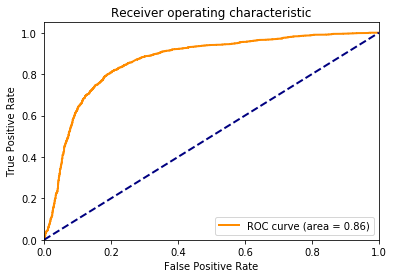

In [0]:
plot_roc(fpr, tpr)